#  Feature Selection
-  Filter Mehods
    1. Chi Squared
    2. Information Gain
    3. Anova
    4. Pearson/Correlation
-  Wrapper Methods
    1. RFE
-  Embedded Methods
    1. Decision Tree
    2. Linear Regression Regression

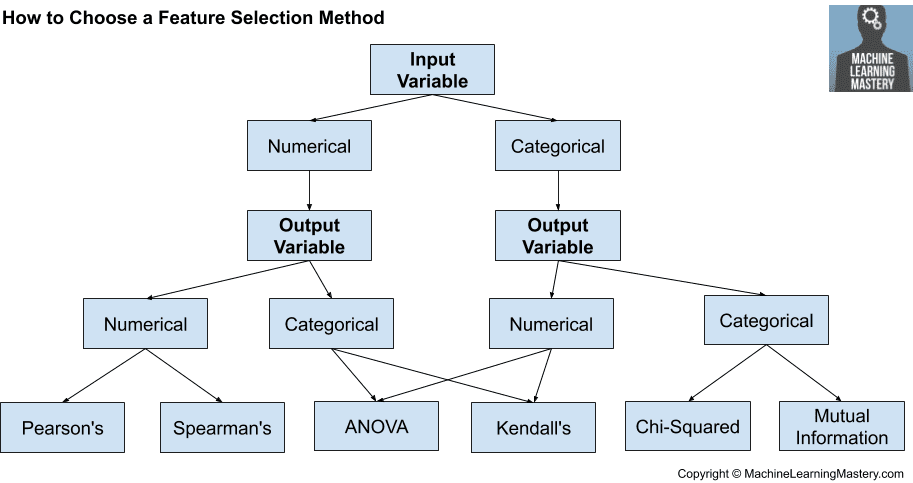

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv ("automobileEDA.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [3]:
data.head(4)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1


In [4]:
data.isna().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [5]:
data = data.dropna()
data.isna().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    0
diesel               0
gas                  0
dtype: int64

# 1.Partition Data

In [6]:
Data1 = data.copy()
Data1

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [7]:
#Getting Data Numeric
Data_num = Data1.select_dtypes(include=np.number)
Data_numeric = Data_num.drop(columns = ["diesel","gas","symboling"])
Data_numeric

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476
1,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476
2,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421
3,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667
4,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,95,109.1,0.907256,0.956944,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391
197,95,109.1,0.907256,0.955556,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421
198,95,109.1,0.907256,0.956944,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556
199,95,109.1,0.907256,0.956944,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462


In [8]:
#Getting Data Categoric
Data_cat = data.drop(columns = Data_numeric.columns)
Data_cat

,symboling,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned,diesel,gas
0,3,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi,Medium,0,1
1,3,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi,Medium,0,1
2,1,alfa-romero,std,two,hatchback,rwd,front,ohcv,six,mpfi,Medium,0,1
3,2,audi,std,four,sedan,fwd,front,ohc,four,mpfi,Medium,0,1
4,2,audi,std,four,sedan,4wd,front,ohc,five,mpfi,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,volvo,std,four,sedan,rwd,front,ohc,four,mpfi,Medium,0,1
197,-1,volvo,turbo,four,sedan,rwd,front,ohc,four,mpfi,High,0,1
198,-1,volvo,std,four,sedan,rwd,front,ohcv,six,mpfi,Medium,0,1
199,-1,volvo,turbo,four,sedan,rwd,front,ohc,six,idi,Medium,1,0


# 2.Pearson Correlation

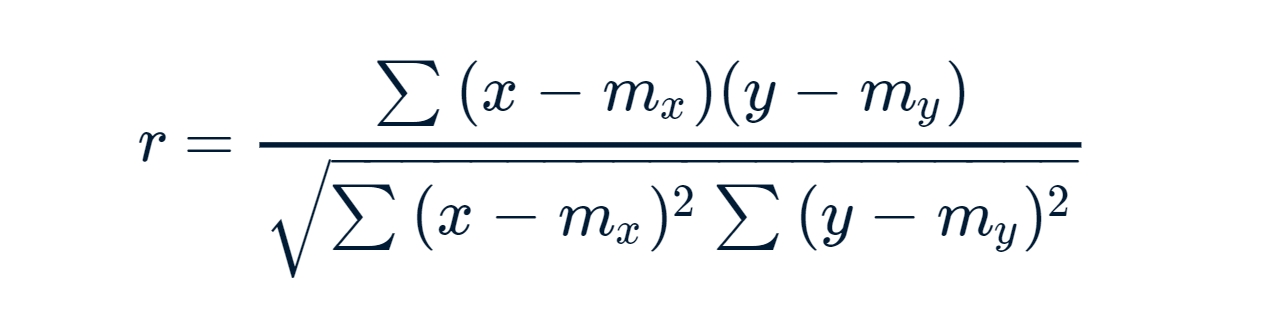

In [9]:
Data_numeric

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476
1,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476
2,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421
3,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667
4,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,95,109.1,0.907256,0.956944,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391
197,95,109.1,0.907256,0.955556,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421
198,95,109.1,0.907256,0.956944,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556
199,95,109.1,0.907256,0.956944,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462


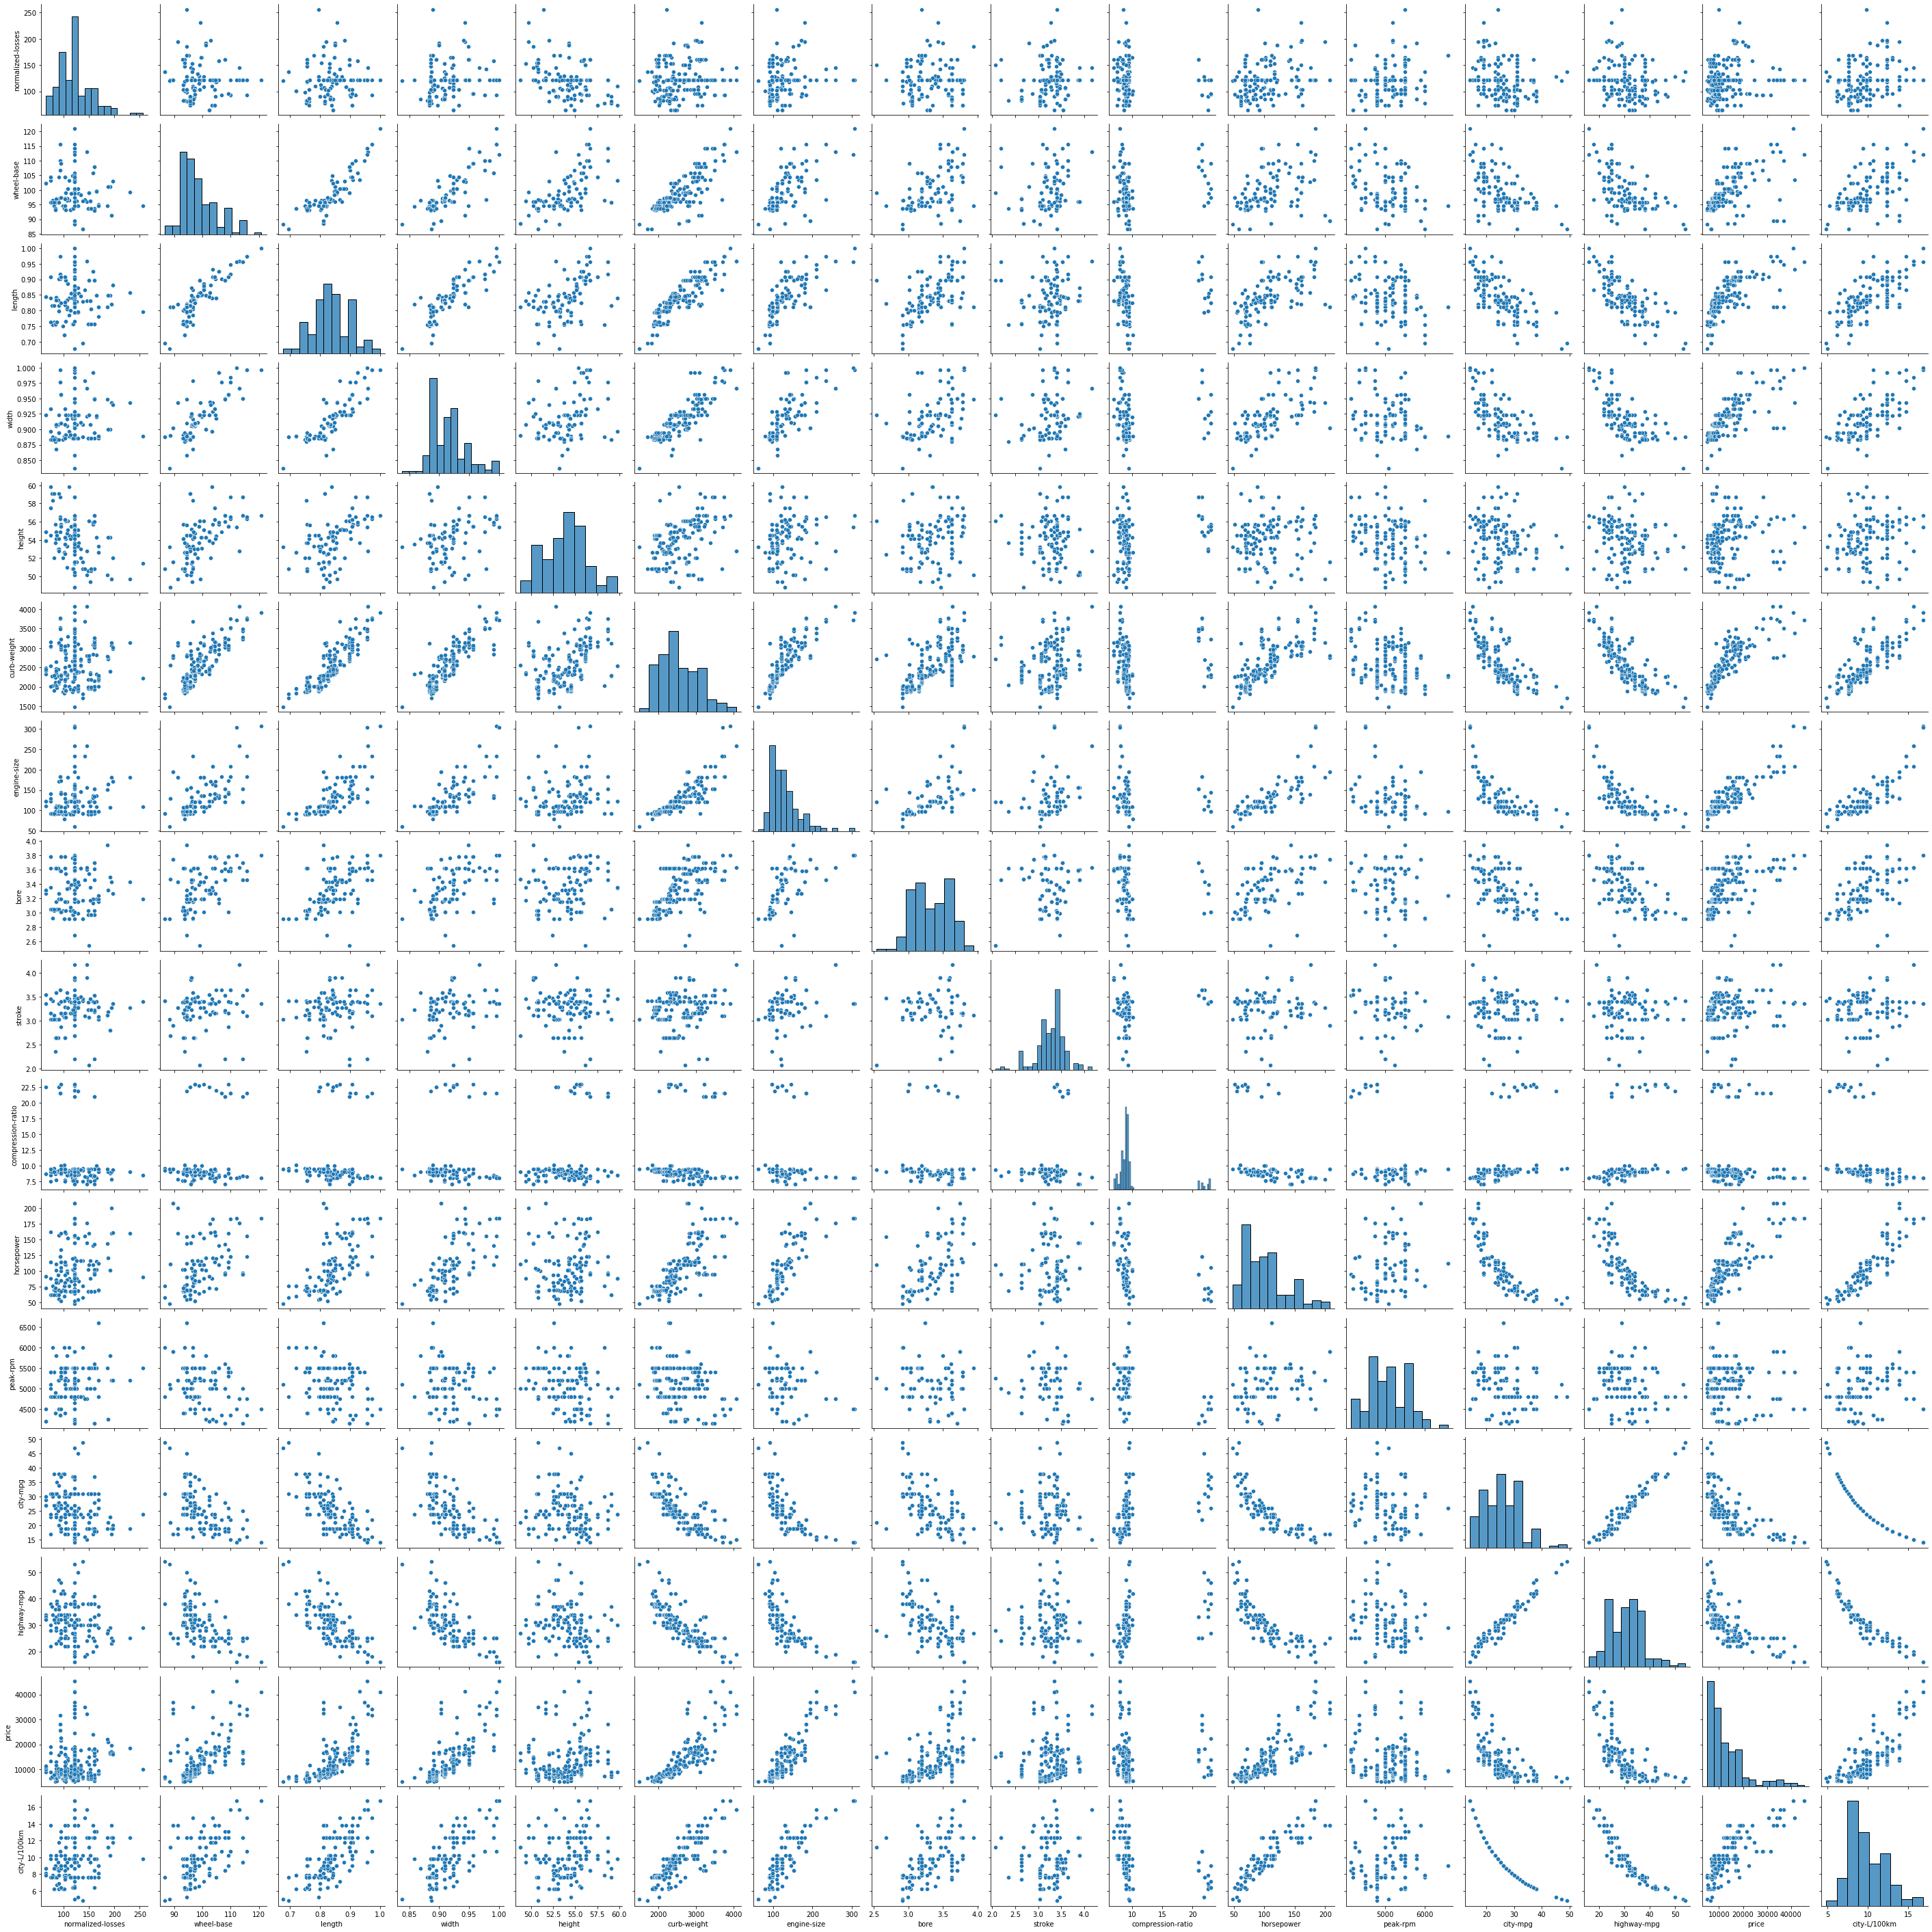

In [41]:
#visualizatation Data Numeric
sns.pairplot(Data_numeric)

Because over all data have to close linear correlation can used parametric statistics (pearson correlation), if the data is non linear used the nonparametric statistics (spearman rank)

In [10]:
correlation = Data_numeric.corr(method = 'pearson')

In [11]:
correlation 

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
normalized-losses,1.000000,-0.046971,0.027234,0.090056,-0.362499,0.107034,0.147862,-0.030152,0.056054,-0.112288,0.226654,0.215903,-0.208695,-0.166772,0.138183,0.223308
wheel-base,-0.046971,1.000000,0.876945,0.821427,0.607417,0.790205,0.592517,0.493941,0.163725,0.248383,0.381984,-0.351925,-0.496565,-0.566948,0.591956,0.517050
length,0.027234,0.876945,1.000000,0.857249,0.522367,0.882091,0.698626,0.608496,0.136850,0.156926,0.583073,-0.280397,-0.686142,-0.715124,0.689466,0.690579
width,0.090056,0.821427,0.857249,1.000000,0.351127,0.862835,0.739543,0.543859,0.210495,0.188331,0.604099,-0.252116,-0.639692,-0.684550,0.744176,0.685663
height,-0.362499,0.607417,0.522367,0.351127,1.000000,0.354085,0.100518,0.199490,-0.084755,0.269773,-0.031489,-0.270020,-0.128523,-0.181670,0.182407,0.111120
curb-weight,0.107034,0.790205,0.882091,0.862835,0.354085,1.000000,0.858968,0.646918,0.193575,0.153952,0.750749,-0.281231,-0.766146,-0.808146,0.828483,0.809512
engine-size,0.147862,0.592517,0.698626,0.739543,0.100518,0.858968,1.000000,0.601384,0.265626,0.017246,0.825377,-0.227577,-0.712693,-0.734062,0.889265,0.814696
bore,-0.030152,0.493941,0.608496,0.543859,0.199490,0.646918,0.601384,1.000000,-0.049606,-0.000044,0.579114,-0.276668,-0.591597,-0.598455,0.544375,0.574286
stroke,0.056054,0.163725,0.136850,0.210495,-0.084755,0.193575,0.265626,-0.049606,1.000000,0.191776,0.139409,-0.067852,-0.050971,-0.052345,0.107893,0.065893
compression-ratio,-0.112288,0.248383,0.156926,0.188331,0.269773,0.153952,0.017246,-0.000044,0.191776,1.000000,-0.232284,-0.444291,0.338958,0.274085,0.067759,-0.315942


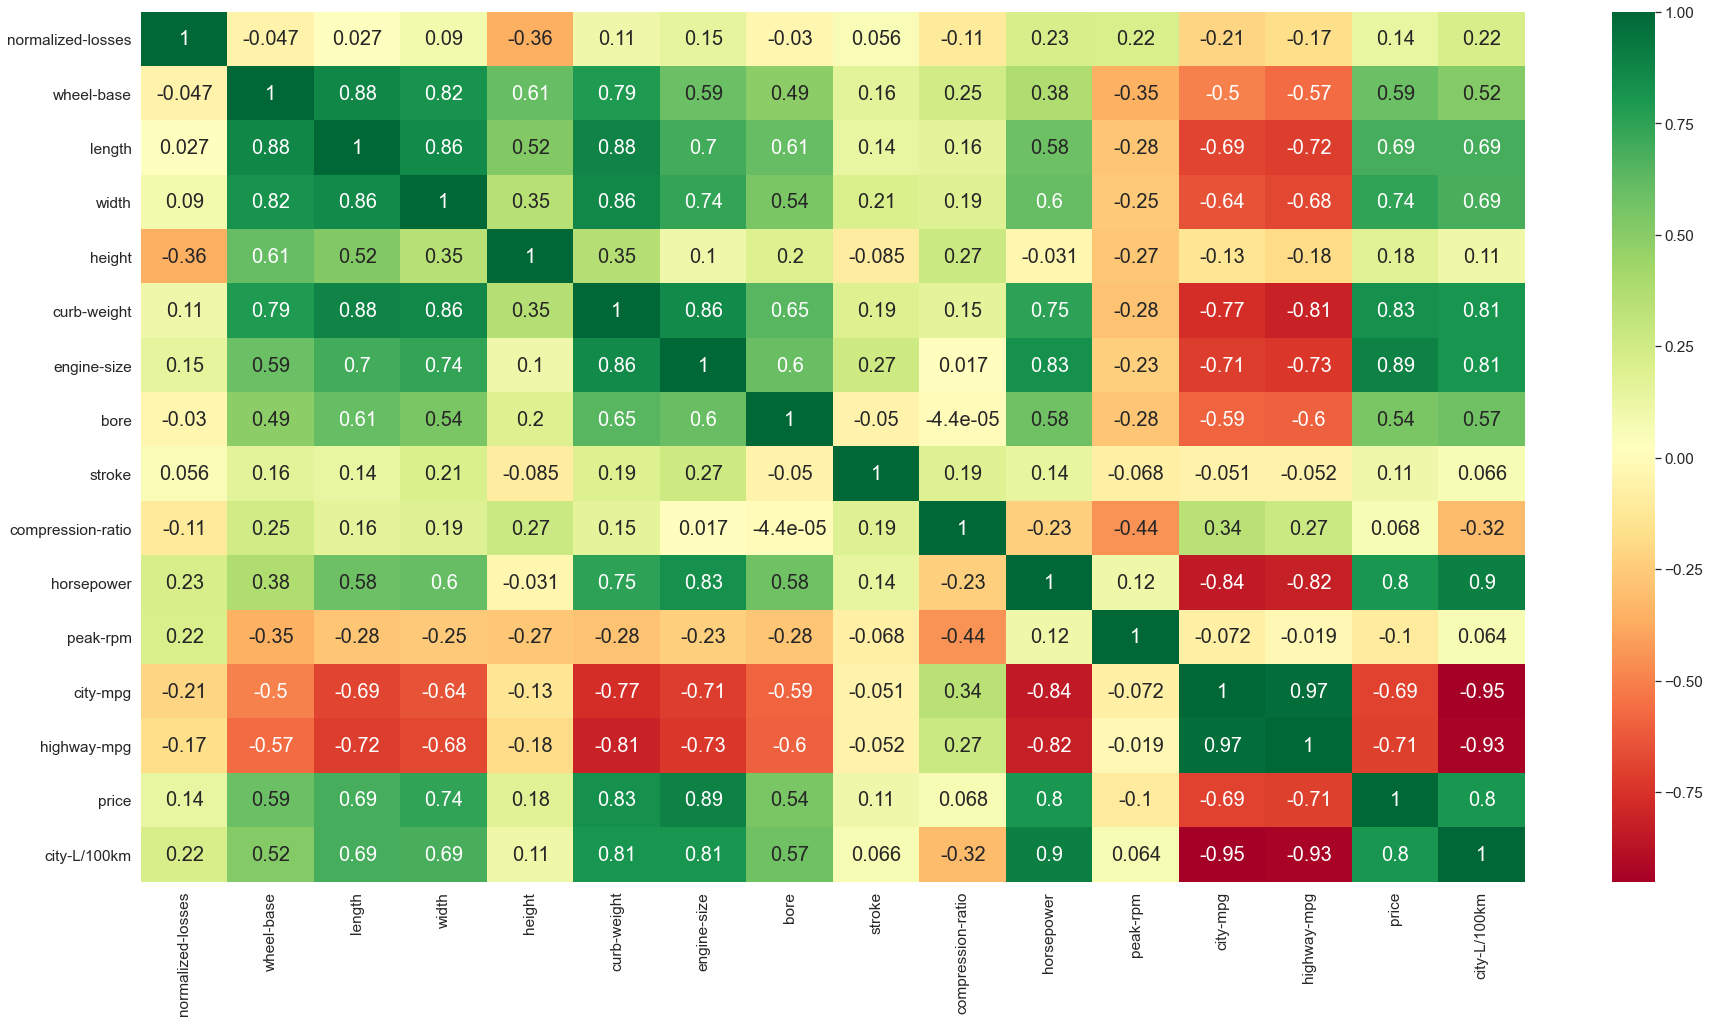

In [21]:
plt.figure(figsize=(31,16))
sns.heatmap(correlation,annot=True,cmap="RdYlGn",annot_kws={"size": 20})
sns.set(font_scale=1.4)

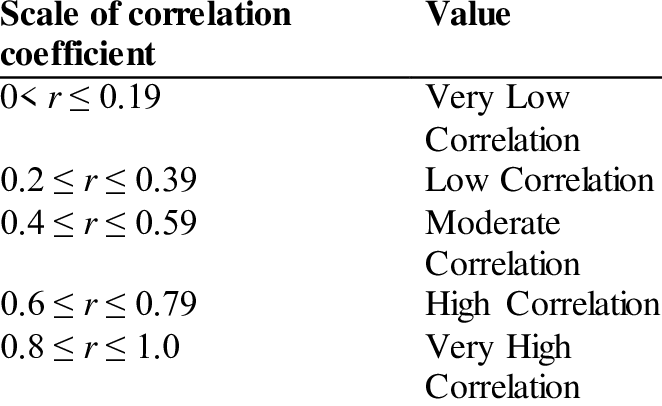

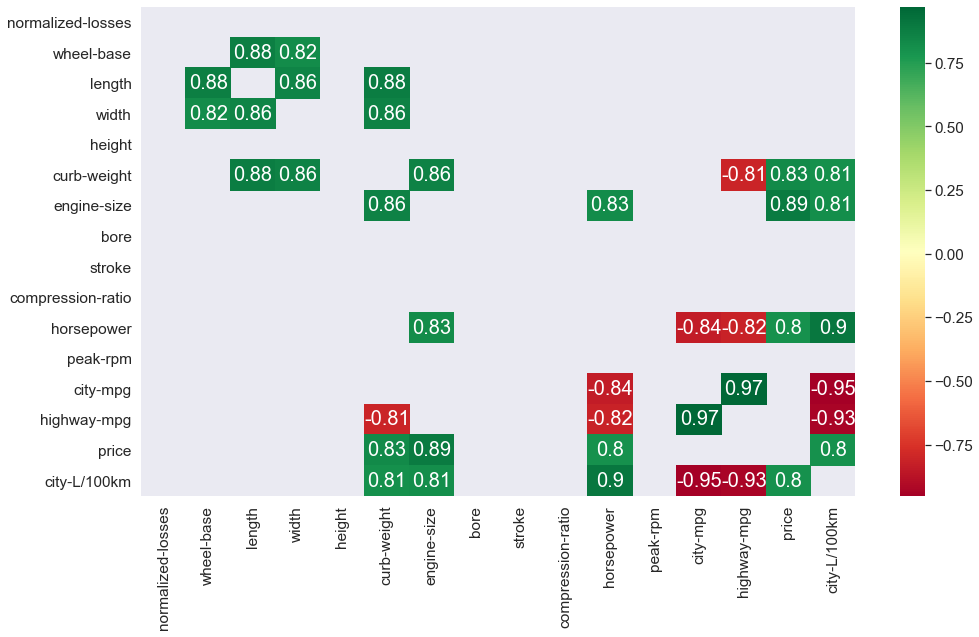

In [22]:
Filter = correlation[((correlation >= 0.8)|(correlation <= -0.8))&(correlation != 1.00)]
plt.figure(figsize=(16,9))
sns.heatmap(Filter,annot=True,cmap="RdYlGn",annot_kws={"size": 20})
sns.set(font_scale=1.4)

# 3. Chi Squared

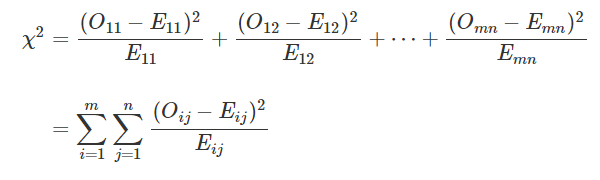

In [23]:
data = pd.read_csv ("automobileEDA.csv")
Data_num = data.select_dtypes(include=np.number)
Data_numeric = Data_num.drop(columns = ["diesel","gas","symboling"])
Data_cat = data.drop(columns = Data_numeric.columns)
Data_cat

,symboling,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned,diesel,gas
0,3,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi,Medium,0,1
1,3,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi,Medium,0,1
2,1,alfa-romero,std,two,hatchback,rwd,front,ohcv,six,mpfi,Medium,0,1
3,2,audi,std,four,sedan,fwd,front,ohc,four,mpfi,Medium,0,1
4,2,audi,std,four,sedan,4wd,front,ohc,five,mpfi,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,volvo,std,four,sedan,rwd,front,ohc,four,mpfi,Medium,0,1
197,-1,volvo,turbo,four,sedan,rwd,front,ohc,four,mpfi,High,0,1
198,-1,volvo,std,four,sedan,rwd,front,ohcv,six,mpfi,Medium,0,1
199,-1,volvo,turbo,four,sedan,rwd,front,ohc,six,idi,Medium,1,0


In [24]:
Data_cat.columns

Index(['symboling', 'make', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders',
       'fuel-system', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [25]:
Data_cat = Data_cat.apply(lambda x:x.astype("category"))
Data_cat = Data_cat.apply(lambda x:x.cat.codes)
Data_cat

,symboling,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned,diesel,gas
0,5,0,0,1,0,2,0,0,2,5,2,0,1
1,5,0,0,1,0,2,0,0,2,5,2,0,1
2,3,0,0,1,2,2,0,4,3,5,2,0,1
3,4,1,0,0,3,1,0,2,2,5,2,0,1
4,4,1,0,0,3,0,0,2,1,5,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1,21,0,0,3,2,0,2,2,5,2,0,1
197,1,21,1,0,3,2,0,2,2,5,0,0,1
198,1,21,0,0,3,2,0,4,3,5,2,0,1
199,1,21,1,0,3,2,0,2,3,3,2,1,0


In [26]:
Data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   symboling          201 non-null    int8 
 1   make               201 non-null    int8 
 2   aspiration         201 non-null    int8 
 3   num-of-doors       201 non-null    int8 
 4   body-style         201 non-null    int8 
 5   drive-wheels       201 non-null    int8 
 6   engine-location    201 non-null    int8 
 7   engine-type        201 non-null    int8 
 8   num-of-cylinders   201 non-null    int8 
 9   fuel-system        201 non-null    int8 
 10  horsepower-binned  201 non-null    int8 
 11  diesel             201 non-null    int8 
 12  gas                201 non-null    int8 
dtypes: int8(13)
memory usage: 2.7 KB


In [27]:
x = Data_cat.drop(columns = ['horsepower-binned'])
y = Data_cat.drop(columns = x.columns)
x

,symboling,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,diesel,gas
0,5,0,0,1,0,2,0,0,2,5,0,1
1,5,0,0,1,0,2,0,0,2,5,0,1
2,3,0,0,1,2,2,0,4,3,5,0,1
3,4,1,0,0,3,1,0,2,2,5,0,1
4,4,1,0,0,3,0,0,2,1,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
196,1,21,0,0,3,2,0,2,2,5,0,1
197,1,21,1,0,3,2,0,2,2,5,0,1
198,1,21,0,0,3,2,0,4,3,5,0,1
199,1,21,1,0,3,2,0,2,3,3,1,0


In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import random
random.seed(123)

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
pvalue = pd.DataFrame (fit.pvalues_)
dfcolumns = pd.DataFrame(x.columns)

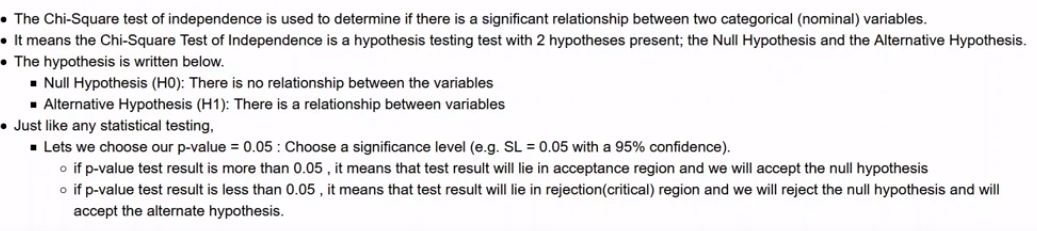

In [31]:
featureScores = pd.concat([dfcolumns,dfscores,pvalue],axis=1)
featureScores.columns = ['Feature','Score','Pvalue'] 
Ranking = featureScores.sort_values('Pvalue',ascending = True)
Feature = Ranking.loc[(Ranking['Pvalue'] <= 0.05)]
Feature

,Feature,Score,Pvalue
9,fuel-system,136.155264,2.549016e-29
6,engine-location,23.217391,3.638131e-05
2,aspiration,18.715884,3.129837e-04
5,drive-wheels,10.734923,1.324910e-02


Text(0, 0.5, 'Feature')

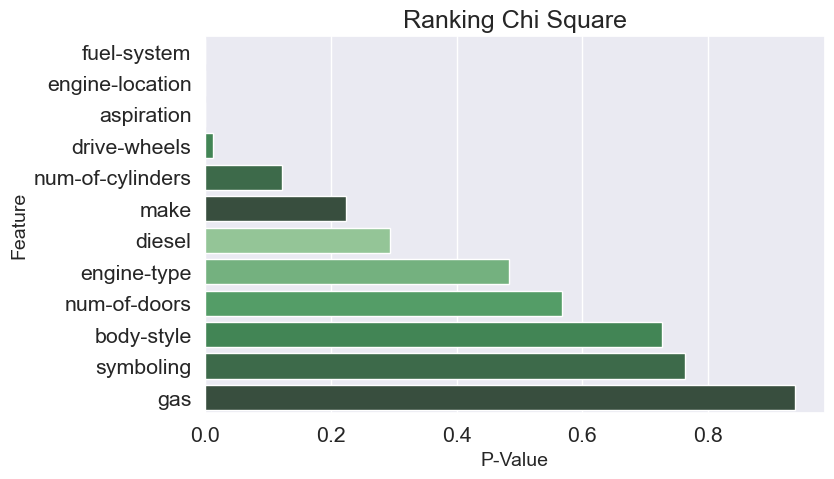

In [32]:
plt.figure(figsize=(8,5), dpi = 100) 
plt.title("Ranking Chi Square", size = 18)

colour = sns.color_palette("Greens_d")
sns.barplot(x = Ranking.Pvalue, y = Ranking.Feature, data = Ranking, palette = colour)

plt.xlabel("P-Value", size = 14)
plt.ylabel("Feature", size = 14)

# 4. Analysis of Variance

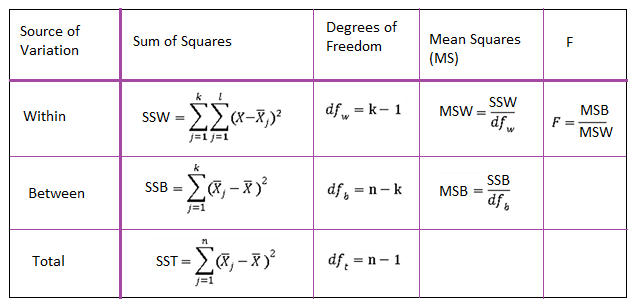

In [33]:
data = pd.read_csv ("automobileEDA.csv")
Data_num = data.select_dtypes(include=np.number)
Data_numeric = Data_num.drop(columns = ["diesel","gas","symboling"])
Data_cat = data.drop(columns = Data_numeric.columns)
data

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [34]:
Data_cat = Data_cat.apply(lambda x:x.astype("category"))
Data_cat = Data_cat.apply(lambda x:x.cat.codes)
Data_cat

,symboling,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned,diesel,gas
0,5,0,0,1,0,2,0,0,2,5,2,0,1
1,5,0,0,1,0,2,0,0,2,5,2,0,1
2,3,0,0,1,2,2,0,4,3,5,2,0,1
3,4,1,0,0,3,1,0,2,2,5,2,0,1
4,4,1,0,0,3,0,0,2,1,5,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1,21,0,0,3,2,0,2,2,5,2,0,1
197,1,21,1,0,3,2,0,2,2,5,0,0,1
198,1,21,0,0,3,2,0,4,3,5,2,0,1
199,1,21,1,0,3,2,0,2,3,3,2,1,0


In [35]:
x = Data_cat
y =  data ['price']

In [36]:
from sklearn.feature_selection import f_regression, SelectKBest
f_score = SelectKBest(score_func = f_regression, k = 10)
fit = f_score.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
pvalue = pd.DataFrame (fit.pvalues_)
dfcolumns = pd.DataFrame(x.columns)

In [37]:
featureScores = pd.concat([dfcolumns,dfscores,pvalue],axis=1)
featureScores.columns = ['Feature','F-Score','Pvalue'] 
Ranking = featureScores.sort_values('Pvalue',ascending = True)
Feature = Ranking.loc[(Ranking['Pvalue'] <= 0.05)]
Feature

,Feature,F-Score,Pvalue
5,drive-wheels,105.344539,4.162616e-20
9,fuel-system,74.411551,2.002444e-15
6,engine-location,24.495550,1.583490e-06
2,aspiration,6.631286,1.074585e-02
10,horsepower-binned,5.680287,1.809729e-02
1,make,5.475889,2.027130e-02


In [38]:
Ranking

,Feature,F-Score,Pvalue
5,drive-wheels,105.344539,4.162616e-20
9,fuel-system,74.411551,2.002444e-15
6,engine-location,24.495550,1.583490e-06
2,aspiration,6.631286,1.074585e-02
10,horsepower-binned,5.680287,1.809729e-02
1,make,5.475889,2.027130e-02
7,engine-type,3.211561,7.463888e-02
11,diesel,2.452020,1.189625e-01
12,gas,2.452020,1.189625e-01
0,symboling,1.360106,2.449149e-01


Text(0, 0.5, 'Feature')

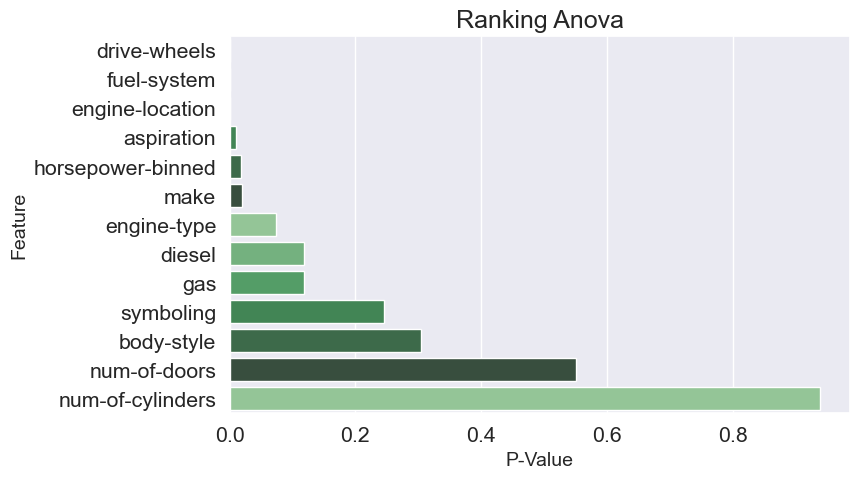

In [39]:
plt.figure(figsize=(8,5), dpi = 100) 
plt.title("Ranking Anova", size = 18)

colour = sns.color_palette("Greens_d")
sns.barplot(x = Ranking.Pvalue, y = Ranking.Feature, data = Ranking, palette = colour)

plt.xlabel("P-Value", size = 14)
plt.ylabel("Feature", size = 14)

# 5. Mutual Information

In [40]:
data = pd.read_csv ("automobileEDA.csv")
Data_num = data.select_dtypes(include=np.number)
Data_numeric = Data_num.drop(columns = ["diesel","gas","symboling"])
Data_cat = data.drop(columns = Data_numeric.columns)
data

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [41]:
Data_cat = Data_cat.apply(lambda x:x.astype("category"))
Data_cat = Data_cat.apply(lambda x:x.cat.codes)
Data_cat

,symboling,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned,diesel,gas
0,5,0,0,1,0,2,0,0,2,5,2,0,1
1,5,0,0,1,0,2,0,0,2,5,2,0,1
2,3,0,0,1,2,2,0,4,3,5,2,0,1
3,4,1,0,0,3,1,0,2,2,5,2,0,1
4,4,1,0,0,3,0,0,2,1,5,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1,21,0,0,3,2,0,2,2,5,2,0,1
197,1,21,1,0,3,2,0,2,2,5,0,0,1
198,1,21,0,0,3,2,0,4,3,5,2,0,1
199,1,21,1,0,3,2,0,2,3,3,2,1,0


In [42]:
x = Data_cat.drop(columns = ['horsepower-binned'])
y = Data_cat.drop(columns = x.columns)

In [43]:
from sklearn.feature_selection import mutual_info_classif as MIF


mi_scores = MIF(x, y, discrete_features='auto')
mi_scores = pd.DataFrame(mi_scores, index=x.columns,columns = ["score"])
scores = mi_scores.sort_values('score',ascending=False)
scores

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,score
fuel-system,0.381410
make,0.208543
num-of-cylinders,0.195207
drive-wheels,0.167377
engine-type,0.070605
body-style,0.057300
aspiration,0.031101
symboling,0.026756
num-of-doors,0.018799
gas,0.010438


Text(0, 0.5, 'Feature')

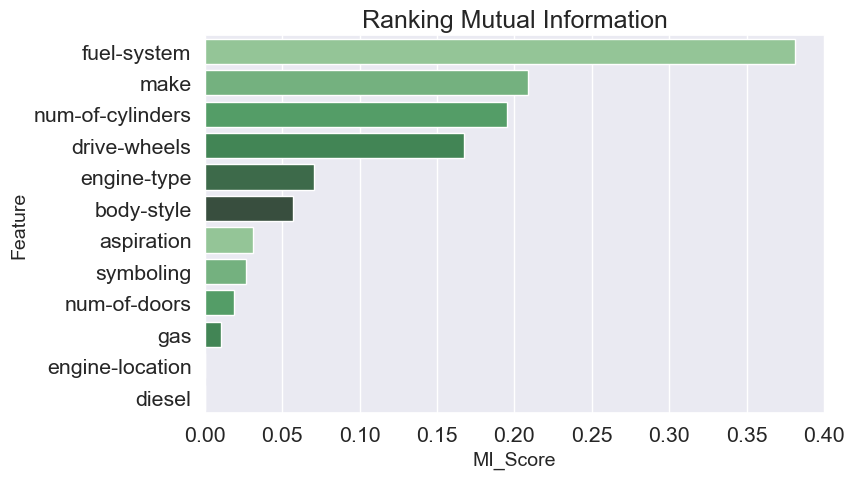

In [44]:
plt.figure(figsize=(8,5), dpi = 100) 
plt.title("Ranking Mutual Information", size = 18)

colour = sns.color_palette("Greens_d")
sns.barplot(x = scores.score, y = scores.index, data = scores, palette = colour)

plt.xlabel("MI_Score", size = 14)
plt.ylabel("Feature", size = 14)

# 6. ExtraTree Feature Importance

In [3]:
data = pd.read_csv ("automobileEDA.csv")
data

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [4]:
#encoding
Data_num = data.select_dtypes(include=np.number)
Data_numeric = Data_num.drop(columns = ["diesel","gas","symboling"])
Data_cat = data.drop(columns = Data_numeric.columns)

Data_cat = Data_cat.apply(lambda x:x.astype("category"))
Data_cat = Data_cat.apply(lambda x:x.cat.codes)

#Join
Dataset = pd.concat([Data_cat,Data_numeric],axis =1)
Dataset

,symboling,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,...,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,5,0,0,1,0,2,0,0,2,5,...,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476
1,5,0,0,1,0,2,0,0,2,5,...,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476
2,3,0,0,1,2,2,0,4,3,5,...,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421
3,4,1,0,0,3,1,0,2,2,5,...,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667
4,4,1,0,0,3,0,0,2,1,5,...,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1,21,0,0,3,2,0,2,2,5,...,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391
197,1,21,1,0,3,2,0,2,2,5,...,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421
198,1,21,0,0,3,2,0,4,3,5,...,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556
199,1,21,1,0,3,2,0,2,3,3,...,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462


In [5]:
Dataset = Dataset.dropna()

In [6]:
Dataset.isna().sum()

symboling            0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
engine-type          0
num-of-cylinders     0
fuel-system          0
horsepower-binned    0
diesel               0
gas                  0
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
dtype: int64

In [7]:
x = Dataset.drop(columns = ['price'])
y = Dataset.drop(columns = x.columns)

In [8]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x, y.values.ravel())

ExtraTreesRegressor()

In [9]:
ETscores = pd.DataFrame(model.feature_importances_)
dfcolumns = pd.DataFrame(x.columns)
Feature = pd.concat([dfcolumns,ETscores],axis = 1)
Feature.columns = ['Feature','ETscores'] 
Ranking = Feature.sort_values('ETscores',ascending = False)
Ranking

,Feature,ETscores
19,engine-size,0.192397
18,curb-weight,0.157946
27,city-L/100km,0.112237
26,highway-mpg,0.096692
23,horsepower,0.075842
25,city-mpg,0.073556
16,width,0.055816
5,drive-wheels,0.050775
6,engine-location,0.030143
9,fuel-system,0.018324


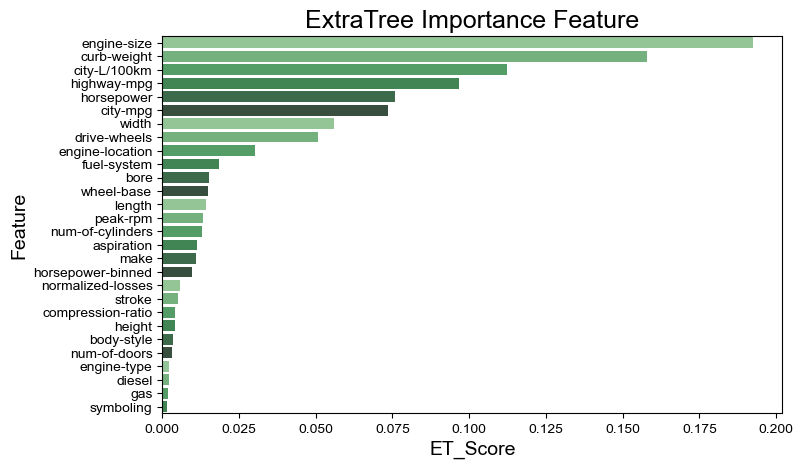

In [10]:
plt.figure(figsize=(8,5), dpi = 100) 
plt.title("ExtraTree Importance Feature", size = 18)

colour = sns.color_palette("Greens_d")
sns.barplot(x = Ranking.ETscores, y = Ranking.Feature, data = Ranking, palette = colour)

plt.xlabel("ET_Score", size = 14)
plt.ylabel("Feature", size = 14)
sns.set(font_scale=0.75)

# 7. Using Linear Regression

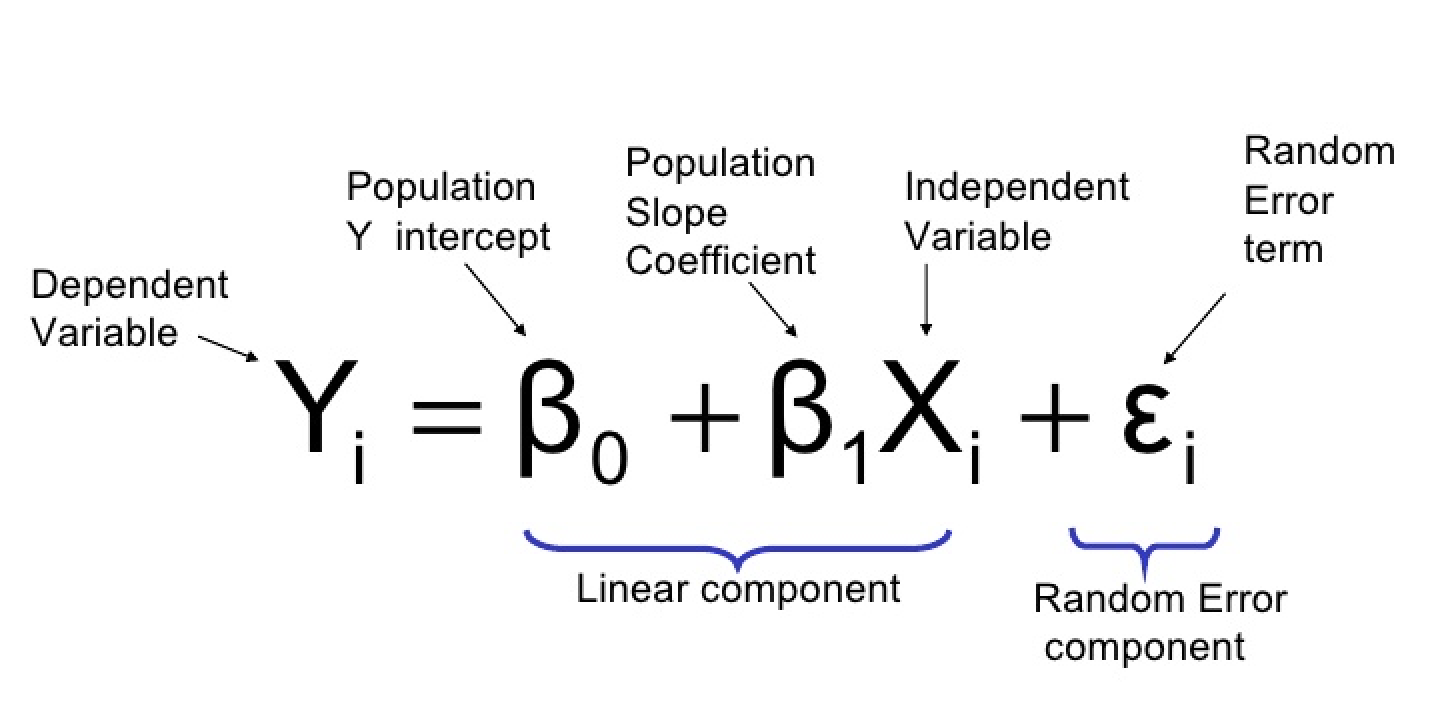

In [55]:
data = pd.read_csv ("automobileEDA.csv")

#encoding
Data_num = data.select_dtypes(include=np.number)
Data_numeric = Data_num.drop(columns = ["diesel","gas","symboling"])
Data_cat = data.drop(columns = Data_numeric.columns)

Data_cat = Data_cat.apply(lambda x:x.astype("category"))
Data_cat = Data_cat.apply(lambda x:x.cat.codes)

#Join
Dataset = pd.concat([Data_cat,Data_numeric],axis =1)

#remove missing
Dataset = Dataset.dropna()
Dataset



,symboling,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,...,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,5,0,0,1,0,2,0,0,2,5,...,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476
1,5,0,0,1,0,2,0,0,2,5,...,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476
2,3,0,0,1,2,2,0,4,3,5,...,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421
3,4,1,0,0,3,1,0,2,2,5,...,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667
4,4,1,0,0,3,0,0,2,1,5,...,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1,21,0,0,3,2,0,2,2,5,...,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391
197,1,21,1,0,3,2,0,2,2,5,...,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421
198,1,21,0,0,3,2,0,4,3,5,...,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556
199,1,21,1,0,3,2,0,2,3,3,...,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462


In [56]:
x = Dataset.drop(columns = ['price'])
y = Dataset.drop(columns = x.columns)

In [57]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [58]:
ETscores = pd.DataFrame(model.coef_)
ETscores = ETscores.T
dfcolumns = pd.DataFrame(x.columns)
Feature = pd.concat([dfcolumns,ETscores],axis = 1)
Feature.columns = ['Feature','ETscores'] 
Ranking = Feature.sort_values('ETscores',ascending = False)
Ranking

,Feature,ETscores
16,width,26764.501060
6,engine-location,11891.076933
12,gas,4027.634814
2,aspiration,2155.010369
15,length,1248.980551
27,city-L/100km,1242.545314
5,drive-wheels,905.845996
22,compression-ratio,695.947131
17,height,309.168440
9,fuel-system,261.844297


Text(0, 0.5, 'Feature')

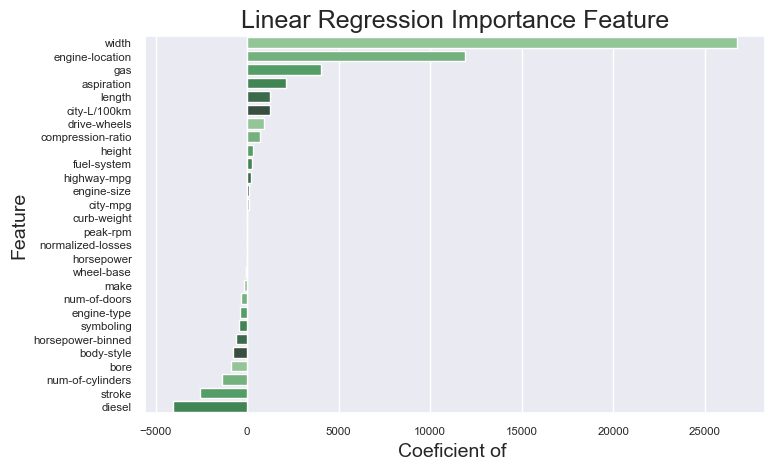

In [59]:
plt.figure(figsize=(8,5), dpi = 100) 
plt.title("Linear Regression Importance Feature", size = 18)

colour = sns.color_palette("Greens_d")
sns.barplot(x = Ranking.ETscores, y = Ranking.Feature, data = Ranking, palette = colour)

plt.xlabel("Coeficient of ", size = 14)
plt.ylabel("Feature", size = 14)

# 8. Recuirsive/Backward Feature Elimination

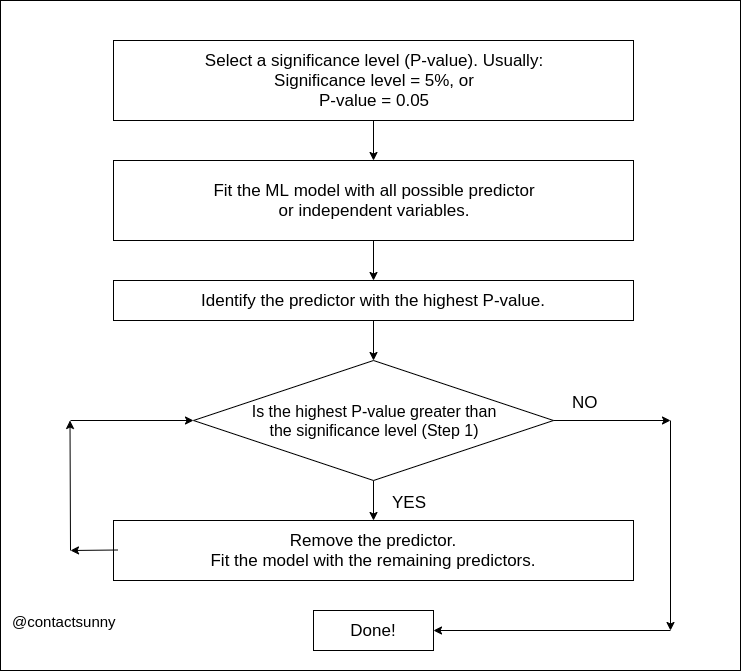

In [169]:
data = pd.read_csv ("automobileEDA.csv")

#encoding
Data_num = data.select_dtypes(include=np.number)
Data_numeric = Data_num.drop(columns = ["diesel","gas","symboling"])
Data_cat = data.drop(columns = Data_numeric.columns)

Data_cat = Data_cat.apply(lambda x:x.astype("category"))
Data_cat = Data_cat.apply(lambda x:x.cat.codes)

#Join
Dataset = pd.concat([Data_cat,Data_numeric],axis =1)

#remove missing
Dataset = Dataset.dropna()
Dataset


,symboling,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,...,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,5,0,0,1,0,2,0,0,2,5,...,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476
1,5,0,0,1,0,2,0,0,2,5,...,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476
2,3,0,0,1,2,2,0,4,3,5,...,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421
3,4,1,0,0,3,1,0,2,2,5,...,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667
4,4,1,0,0,3,0,0,2,1,5,...,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1,21,0,0,3,2,0,2,2,5,...,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391
197,1,21,1,0,3,2,0,2,2,5,...,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421
198,1,21,0,0,3,2,0,4,3,5,...,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556
199,1,21,1,0,3,2,0,2,3,3,...,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462


In [174]:
x = Dataset.drop(columns = ['price'])
y = Dataset.drop(columns = x.columns)

In [179]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor


In [186]:
X = x
y = y
names=pd.DataFrame(x.columns)


rdm = RandomForestRegressor()

#This is to select 5 variables: can be changed and checked in model for accuracy
rfe_mod = RFE(rdm, 6, step=1) 
myvalues=rfe_mod.fit(X,y) 
myvalues.support_
myvalues.ranking_

 #Make it into data frame
rankings=pd.DataFrame(myvalues.ranking_) #Make it into data frame
ranked=pd.concat([names,rankings], axis=1)
ranked.columns = ["Feature", "Rank"]

most_important = pd.DataFrame (ranked.loc[ranked['Rank'] ==1] )
most_important


C:\Users\win 8\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\feature_selection\_rfe.py:241: DataConversionWarning: A column-vector y was passed when a 1d array was exp

,Feature,Rank
1,make,1
16,width,1
18,curb-weight,1
19,engine-size,1
23,horsepower,1
26,highway-mpg,1


# 9. Evaluation the Model based Forward Selection

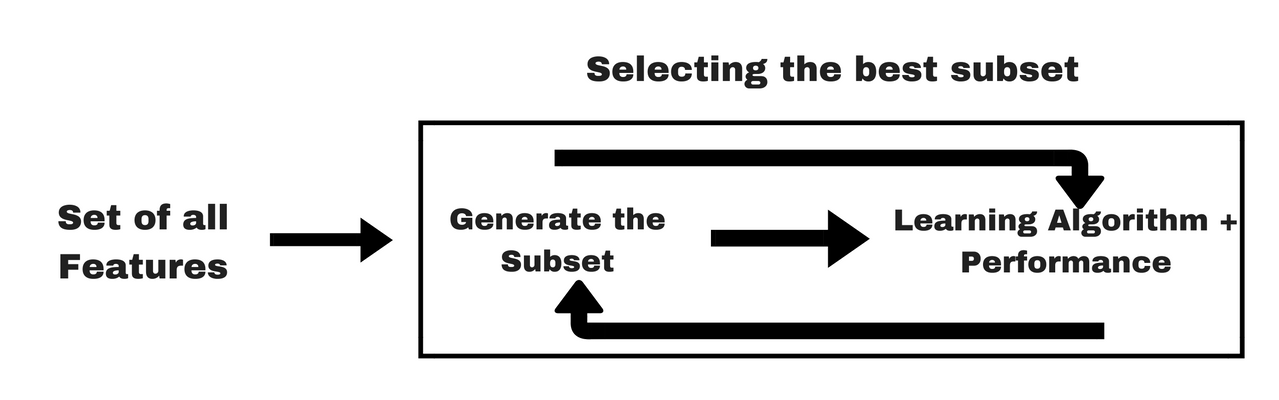

In [18]:
data = pd.read_csv ("automobileEDA.csv")

#encoding
Data_num = data.select_dtypes(include=np.number)
Data_numeric = Data_num.drop(columns = ["diesel","gas","symboling"])
Data_cat = data.drop(columns = Data_numeric.columns)

Data_cat = Data_cat.apply(lambda x:x.astype("category"))
Data_cat = Data_cat.apply(lambda x:x.cat.codes)

#Join
Dataset = pd.concat([Data_cat,Data_numeric],axis =1)

#remove missing
Dataset = Dataset.dropna()
Dataset


,symboling,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,...,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,5,0,0,1,0,2,0,0,2,5,...,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476
1,5,0,0,1,0,2,0,0,2,5,...,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476
2,3,0,0,1,2,2,0,4,3,5,...,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421
3,4,1,0,0,3,1,0,2,2,5,...,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667
4,4,1,0,0,3,0,0,2,1,5,...,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1,21,0,0,3,2,0,2,2,5,...,141,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,10.217391
197,1,21,1,0,3,2,0,2,2,5,...,141,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,12.368421
198,1,21,0,0,3,2,0,4,3,5,...,173,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,13.055556
199,1,21,1,0,3,2,0,2,3,3,...,145,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,9.038462


In [22]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          197 non-null    int8   
 1   make               197 non-null    int8   
 2   aspiration         197 non-null    int8   
 3   num-of-doors       197 non-null    int8   
 4   body-style         197 non-null    int8   
 5   drive-wheels       197 non-null    int8   
 6   engine-location    197 non-null    int8   
 7   engine-type        197 non-null    int8   
 8   num-of-cylinders   197 non-null    int8   
 9   fuel-system        197 non-null    int8   
 10  horsepower-binned  197 non-null    int8   
 11  diesel             197 non-null    int8   
 12  gas                197 non-null    int8   
 13  normalized-losses  197 non-null    int64  
 14  wheel-base         197 non-null    float64
 15  length             197 non-null    float64
 16  width              197 non

In [26]:
x = Dataset.drop(columns = ['horsepower-binned'])
y = Dataset.drop(columns = x.columns)

In [27]:
import numpy as np
import pandas as pd
#from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc

In [6]:
!pip install mlxtend 


In [7]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [36]:
#Partition Data Training and Testing
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [29]:
X_train

,symboling,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,...,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km
42,2,6,0,0,3,2,0,2,2,1,...,2337,111,3.31,3.23,8.5,78.0,4800.0,24,29,9.791667
70,2,9,0,0,3,2,0,4,0,5,...,3900,308,3.80,3.35,8.0,184.0,4500.0,14,16,16.785714
162,3,19,0,1,2,2,0,0,2,5,...,2300,98,3.24,3.08,9.4,112.0,6600.0,26,29,9.038462
82,3,11,0,0,3,1,0,2,2,1,...,2365,122,3.35,3.46,8.5,88.0,5000.0,25,32,9.400000
122,5,15,0,1,2,2,0,2,2,5,...,2778,151,3.94,3.11,9.5,143.0,5500.0,19,27,12.368421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2,13,0,0,4,2,0,1,2,5,...,3285,120,3.46,2.19,8.4,95.0,5000.0,19,24,12.368421
14,2,2,0,0,3,2,0,2,3,5,...,3230,209,3.62,3.39,8.0,182.0,5400.0,16,22,14.687500
96,2,12,0,0,2,1,0,2,2,1,...,2324,120,3.33,3.47,8.5,97.0,5200.0,27,34,8.703704
183,4,20,1,0,3,1,0,2,2,3,...,2319,97,3.01,3.40,23.0,68.0,4500.0,37,42,6.351351


In [30]:
X_test

,symboling,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,...,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km
144,2,18,0,0,4,0,0,3,2,1,...,2420,108,3.62,2.64,9.00,82.000000,4800.000000,23,29,10.217391
117,3,14,0,0,2,1,0,2,2,1,...,1967,90,2.97,3.23,9.40,68.000000,5500.000000,31,38,7.580645
16,2,2,0,0,3,2,0,2,3,5,...,3505,209,3.62,3.39,8.00,182.000000,5400.000000,15,20,15.666667
79,5,11,1,1,2,1,0,2,2,6,...,2833,156,3.58,3.86,7.00,145.000000,5000.000000,19,24,12.368421
159,3,19,0,1,3,2,0,2,2,1,...,2169,98,3.19,3.03,9.00,70.000000,4800.000000,29,34,8.103448
190,0,21,0,0,3,2,0,2,2,5,...,2912,141,3.78,3.15,9.50,114.000000,5400.000000,23,28,10.217391
73,4,11,0,1,2,1,0,2,2,1,...,1918,92,2.97,3.23,9.40,68.000000,5500.000000,37,41,6.351351
59,2,8,0,0,3,1,0,2,2,1,...,2410,122,3.39,3.39,8.60,84.000000,4800.000000,26,32,9.038462
18,3,3,0,1,2,1,0,2,2,1,...,1874,90,3.03,3.11,9.60,70.000000,5400.000000,38,43,6.184211
174,5,19,0,1,2,2,0,0,3,5,...,2976,171,3.27,3.35,9.30,161.000000,5200.000000,20,24,11.750000


In [65]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Forward feature selection
sfs1 = sfs(clf,k_features=10,forward=True,floating=False,verbose=2,scoring='accuracy',cv=5)

# Perform 
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversio

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   49.9s finished

[2021-10-21 11:46:08] Features: 2/10 -- score: 0.9933333333333334[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The leas

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has 

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has 

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has 

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has 

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has 

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversion

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has 

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has 

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has 

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has 

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\win 8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

In [66]:
feat_cols = list(sfs1.k_feature_idx_)
feat_cols


[0, 1, 2, 3, 5, 6, 7, 15, 19, 22]

In [67]:
X_train.iloc[:,feat_cols]

,symboling,make,aspiration,num-of-doors,drive-wheels,engine-location,engine-type,width,bore,horsepower
42,2,6,0,0,2,0,2,0.858333,3.31,78.0
70,2,9,0,0,2,0,4,0.995833,3.80,184.0
162,3,19,0,1,2,0,0,0.888889,3.24,112.0
82,3,11,0,0,1,0,2,0.908333,3.35,88.0
122,5,15,0,1,2,0,2,0.948611,3.94,143.0
...,...,...,...,...,...,...,...,...,...,...
110,2,13,0,0,2,0,1,0.950000,3.46,95.0
14,2,2,0,0,2,0,2,0.929167,3.62,182.0
96,2,12,0,0,1,0,2,0.905556,3.33,97.0
183,4,20,1,0,1,0,2,0.909722,3.01,68.0


In [68]:
clf = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=4)
clf.fit(X_train.iloc[:, feat_cols], y_train)

y_train_pred = clf.predict(X_train.iloc[:, feat_cols])
print('Training accuracy on selected features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = clf.predict(X_test.iloc[:, feat_cols])
print('Testing accuracy on selected features: %.3f' % acc(y_test, y_test_pred))

<ipython-input-68-9afef6351c26>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train.iloc[:, feat_cols], y_train)


Training accuracy on selected features: 0.993
Testing accuracy on selected features: 1.000


In [72]:
# Build full model on ALL features, for comparison
clf = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=4)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
print('Training accuracy on all features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = clf.predict(X_test)
print('Testing accuracy on all features: %.3f' % acc(y_test, y_test_pred))

<ipython-input-72-770888a6d15c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


Training accuracy on all features: 0.986
Testing accuracy on all features: 0.980
